# Data set Description


**Dataset -** Art Images: Drawing/Painting/Sculptures/Engravings

**Description:**

Dataset with about 9000 images from google images, yandex images containing 5 types of arts namely:
1. Drawings and watercolours
2. Works of painting
3. Sculpture
4. Graphic Art
5. Iconography (old Russian art)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Data distribution details**

In [ ]:
import os

print("Training Data:")

print('total training drawings images:', len(os.listdir('drive/MyDrive/data/training_set/drawings')))
print('total training engraving images:', len(os.listdir('drive/MyDrive/data/training_set/engraving')))
print('total training iconography images:', len(os.listdir('drive/MyDrive/data/training_set/iconography')))
print('total training painting images:', len(os.listdir('drive/MyDrive/data/training_set/painting')))
print('total training sculpture images:', len(os.listdir('drive/MyDrive/data/training_set/sculpture')))


print("Test Data:")

print('total test drawings images:', len(os.listdir('drive/MyDrive/data/validation_set/drawings')))
print('total test engraving images:', len(os.listdir('drive/MyDrive/data/validation_set/engraving')))
print('total test iconography images:', len(os.listdir('drive/MyDrive/data/validation_set/iconography')))
print('total test painting images:', len(os.listdir('drive/MyDrive/data/validation_set/painting')))
print('total test sculpture images:', len(os.listdir('drive/MyDrive/data/validation_set/sculpture')))

Training Data:
total training drawings images: 1107
total training engraving images: 757
total training iconography images: 2079
total training painting images: 2042
total training sculpture images: 1738
Test Data:
total test drawings images: 122
total test engraving images: 84
total test iconography images: 231
total test painting images: 234
total test sculpture images: 193


# Pre-processing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        'drive/MyDrive/data/training_set',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'drive/MyDrive/data/validation_set',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 7720 images belonging to 5 classes.
Found 852 images belonging to 5 classes.


# Model 1 

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 112s 968ms/step - loss: 1.3526 - accuracy: 0.4285 - val_loss: 0.7848 - val_accuracy: 0.6800
Epoch 2/5
 35/100 [=========>....................] - ETA: 1:01 - loss: 0.8144 - accuracy: 0.6663

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 95s 953ms/step - loss: 0.8109 - accuracy: 0.6784 - val_loss: 0.7436 - val_accuracy: 0.7500
Epoch 3/5
100/100 [==============================] - 95s 949ms/step - loss: 0.7674 - accuracy: 0.7199 - val_loss: 0.6863 - val_accuracy: 0.7400
Epoch 4/5
100/100 [==============================] - 95s 950ms/step - loss: 0.6345 - accuracy: 0.7743 - val_loss: 0.9126 - val_accuracy: 0.7000
Epoch 5/5
100/100 [==============================] - 95s 950ms/step - loss: 0.6708 - accuracy: 0.7645 - val_loss: 0.6046 - val_accuracy: 0.7900


**Performance**

In [ ]:
model.save('model_1.h5')

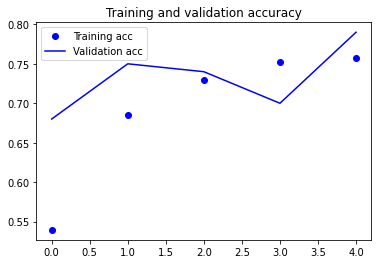

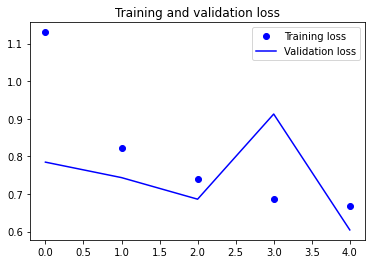

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model 2 - more convolutional layers


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
100/100 [==============================] - 95s 950ms/step - loss: 0.7568 - accuracy: 0.7235 - val_loss: 0.6538 - val_accuracy: 0.7300
Epoch 2/3
100/100 [==============================] - 95s 951ms/step - loss: 0.7361 - accuracy: 0.7255 - val_loss: 0.6324 - val_accuracy: 0.7900
Epoch 3/3
100/100 [==============================] - 95s 948ms/step - loss: 0.6785 - accuracy: 0.7505 - val_loss: 0.6002 - val_accuracy: 0.7500


**Performance**

In [ ]:
model.save('model_2.h5')

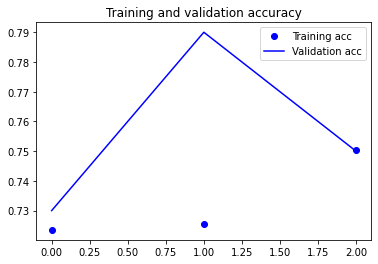

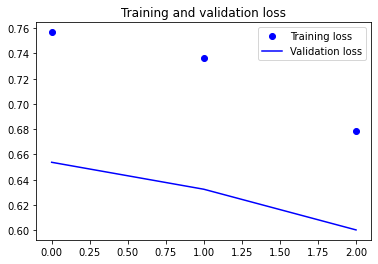

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model 3 - Activation functions

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))

model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=3,
      validation_data=validation_generator,
      validation_steps=5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
 29/100 [=======>......................] - ETA: 1:09 - loss: 1.7212 - accuracy: 0.2564

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 100s 989ms/step - loss: 1.4232 - accuracy: 0.3996 - val_loss: 0.7970 - val_accuracy: 0.6800
Epoch 2/3
100/100 [==============================] - 99s 984ms/step - loss: 0.8394 - accuracy: 0.7011 - val_loss: 0.6734 - val_accuracy: 0.7700
Epoch 3/3
100/100 [==============================] - 98s 983ms/step - loss: 0.7673 - accuracy: 0.7170 - val_loss: 0.8767 - val_accuracy: 0.6700


**Performance**

In [ ]:
model.save('model_3.h5')

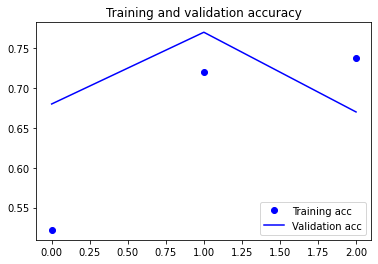

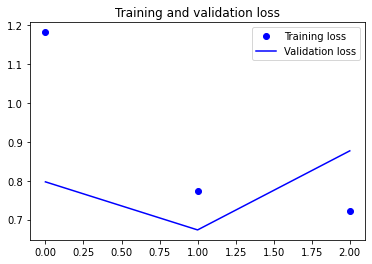

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()